In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import *
from configs import DatasetConfiguration
from utils_train import *
from configs import *
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import seaborn as sb
import deepdish as dd

seed = 42
np.random.seed(seed=seed)

splitting = 'custom'
data_setting = 'rawflt'

clean = False

/home/kalfasyan/anaconda3/envs/wbtf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kalfasyan/anaconda3/envs/wbtf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kalfasyan/anaconda3/envs/wbtf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kalfasyan/anaconda3/envs/wbtf/lib/pyt

### data collecting

In [2]:
mebios = DatasetConfiguration(names=['Suzukii_RL'])
mebios.select_all(); 
mebios.read();
print(f"Before cleaning: \n{mebios.df.labels.value_counts()}")
if clean:
    mebios.clean();
mebios.df.labels.value_counts()

Dataset - Suzukii_RL - exists: True
Before cleaning: 
L    21940
R    14348
Name: labels, dtype: int64


L    21940
R    14348
Name: labels, dtype: int64

In [3]:
print("Before cleaning:")
rodr_tr,rodr_ts = train_test_filenames2(dataset='Rodrigo',species='D. melanogaster', clean=False, plot=False, test_dates=['20200310','20200311','20200312', '20200313', '20200314', '20200315','20200316'])
print("After cleaning")
rodr_tr,rodr_ts = train_test_filenames2(dataset='Rodrigo',species='D. melanogaster', clean=clean, plot=False, test_dates=['20200310','20200311','20200312', '20200313', '20200314', '20200315','20200316'])

Before cleaning:
Dataset - Rodrigo - exists: True
['20200309', '20200305', '20200302', '20200311', '20200310', '20200228', '20200307', '20200304', '20200301', '20200303', '20200306', '20200308', '20200229', '20200316', '20200315', '20200227', '20200313', '20200314', '20200312']
7145 train filenames, 1593 test filenames
After cleaning
Dataset - Rodrigo - exists: True
['20200309', '20200305', '20200302', '20200311', '20200310', '20200228', '20200307', '20200304', '20200301', '20200303', '20200306', '20200308', '20200229', '20200316', '20200315', '20200227', '20200313', '20200314', '20200312']
7145 train filenames, 1593 test filenames


In [4]:
rodsuz = DatasetConfiguration(names=['Rodrigo'])
rodsuz.select(name='Rodrigo', species=['D. suzukii'])
rodsuz.read()
print(f"Before cleaning: \n{rodsuz.df.labels.value_counts()}")
if clean:
    rodsuz.clean()
rodsuz.df.labels.value_counts()    

Dataset - Rodrigo - exists: True
Before cleaning: 
D. suzukii    1098
Name: labels, dtype: int64


D. suzukii    1098
Name: labels, dtype: int64

In [5]:
mebiosmelX = DatasetConfiguration(names=['Melanogaster_RL'])
mebiosmelX.select(name='Melanogaster_RL', species=['X'])
mebiosmelX.read()
print(f"Before cleaning: \n{mebiosmelX.df.labels.value_counts()}")
if clean:
    mebiosmelX.clean()
mebiosmelX.df.labels = mebiosmelX.df.labels.apply(lambda x: x.replace("X", "D. melanogaster"))
mebiosmelX.df.labels.value_counts()

Dataset - Melanogaster_RL - exists: True
Before cleaning: 
X    2086
Name: labels, dtype: int64


D. melanogaster    2086
Name: labels, dtype: int64

In [6]:
mebiosmelW = DatasetConfiguration(names=['Melanogaster_RL'])
mebiosmelW.select(name='Melanogaster_RL', species=['W'])
mebiosmelW.read()
print(f"Before cleaning: \n{mebiosmelW.df.labels.value_counts()}")
if clean:
    mebiosmelW.clean()
mebiosmelW.df.labels = mebiosmelW.df.labels.apply(lambda x: x.replace("W", "D. melanogaster"))
mebiosmelW.df.labels.value_counts()

Dataset - Melanogaster_RL - exists: True
Before cleaning: 
W    1882
Name: labels, dtype: int64


D. melanogaster    1882
Name: labels, dtype: int64

In [7]:
mebiosmelY = DatasetConfiguration(names=['Melanogaster_RL'])
mebiosmelY.select(name='Melanogaster_RL', species=['Y'])
mebiosmelY.read()
print(f"Before cleaning: \n{mebiosmelY.df.labels.value_counts()}")
if clean:
    mebiosmelY.clean()
mebiosmelY.df.labels = mebiosmelY.df.labels.apply(lambda x: x.replace("Y", "D. melanogaster"))
mebiosmelY.df.labels.value_counts()

Dataset - Melanogaster_RL - exists: True
Before cleaning: 
Y    21066
Name: labels, dtype: int64


D. melanogaster    21066
Name: labels, dtype: int64

In [8]:
mebiosmelY.parse_filenames()
mebiosmelW.parse_filenames()
mebiosmelX.parse_filenames()
mebios.parse_filenames()

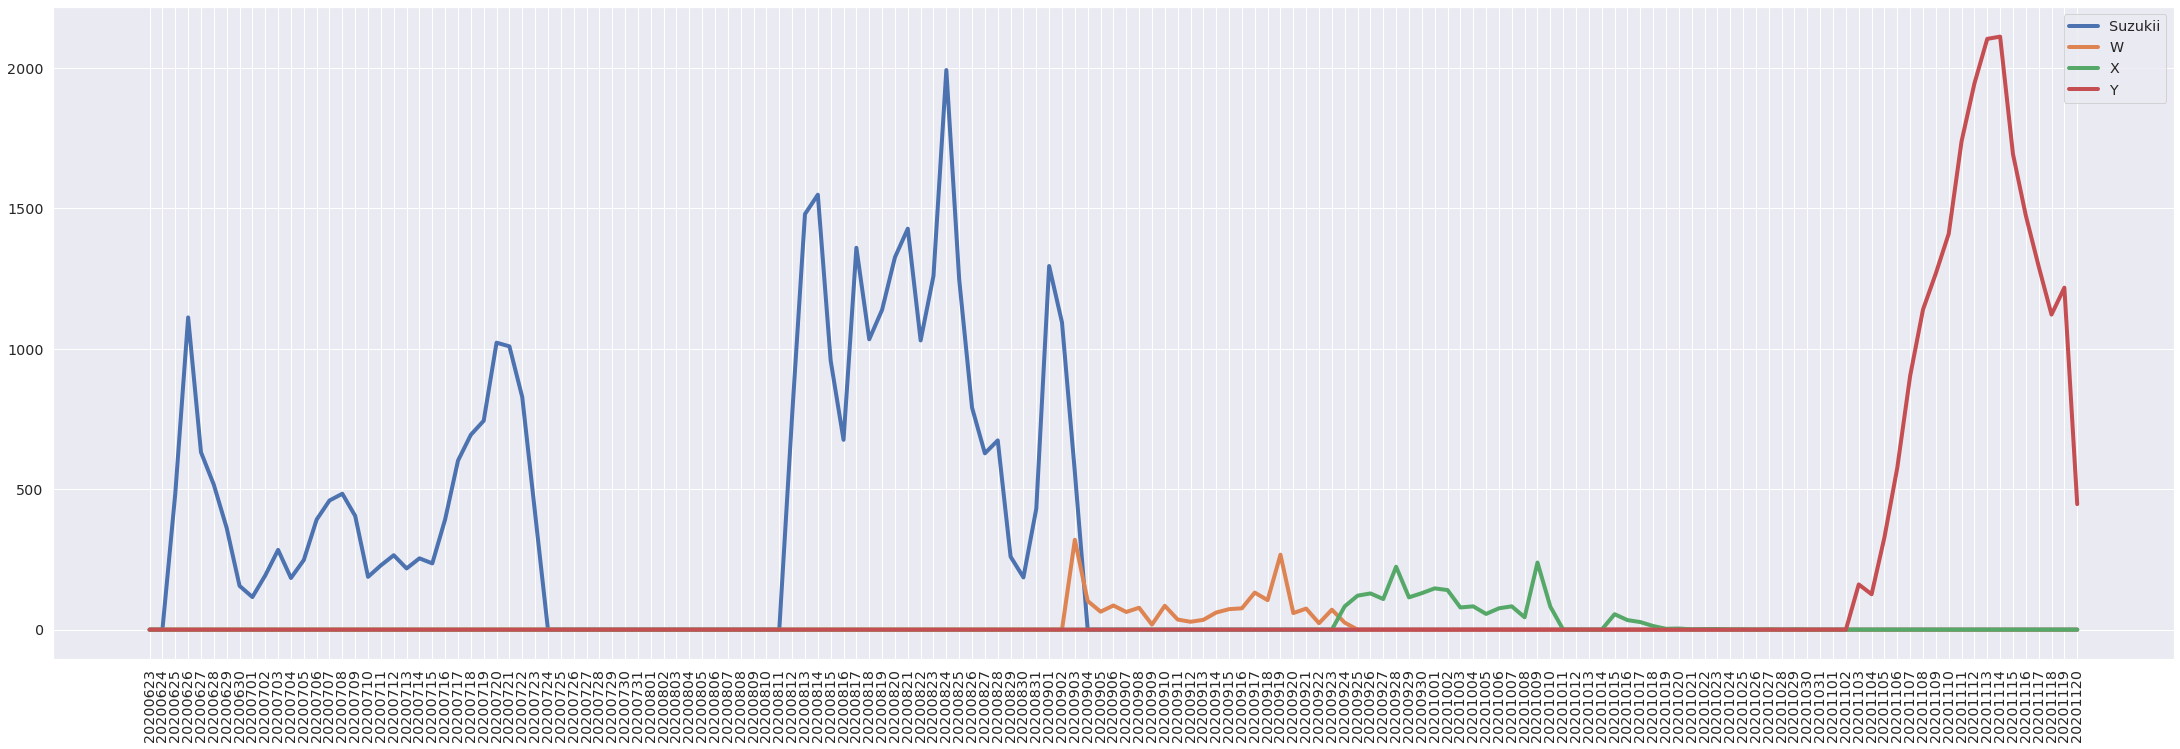

In [15]:
import seaborn as sns
sns.set(font_scale=1.3)
start='20200623' 
end='20201120'
figx=12
figy=38
mebios.plot_daterange(start=start, end=end, figx=figx, figy=figy)
mebiosmelW.plot_daterange(start=start, end=end, figx=figx, figy=figy)
mebiosmelX.plot_daterange(start=start, end=end, figx=figx, figy=figy)
mebiosmelY.plot_daterange(start=start, end=end, figx=figx, figy=figy)
plt.legend(['Suzukii','W','X','Y'])